In [1]:
import numpy as np 
import pandas as pd 
import scipy as sp 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from glob import glob
import scipy.constants as const
from scipy.signal import find_peaks

import warnings
warnings.filterwarnings("ignore")
# plt.style.use("plot_style.mplstyle")

In [2]:
frequency_target_THz = {
            '0' : {'0': 230.35,'1': 229.95,'2': 229.55,'3': 229.15,'4': 228.75,'5': 228.35,'6': 227.95,'7': 227.55},
            '1' : {'0': 230.15,'1': 229.75,'2': 229.35,'3': 228.95,'4': 228.55,'5': 228.15,'6': 227.75,'7': 227.35},
            }
wavelength_target_nm = {
            '0' : {'0': 1301.47,'1': 1303.73,'2': 1306.01,'3': 1308.28,'4': 1310.57,'5': 1312.87,'6': 1315.17,'7': 1317.48},
            '1': {'0': 1302.6,'1': 1304.87,'2': 1307.14,'3': 1309.43,'4': 1311.72,'5': 1314.02,'6': 1316.33,'7': 1318.64}
            }

freq_target_THz_A = [230.35, 229.95, 229.55, 229.15, 228.75, 228.35, 227.95, 227.55]
freq_target_THz_B = [230.15, 229.75, 229.35, 228.95, 228.55, 228.15, 227.75, 227.35]
wavelength_target_nm_A = [1301.47, 1303.73, 1306.01, 1308.28, 1310.57, 1312.87, 1315.17, 1317.48]
wavelength_target_nm_B = [1302.6, 1304.87, 1307.14, 1309.43, 1311.72, 1314.02, 1316.33, 1318.64]

In [3]:
wavelength_target_nm.items()

dict_items([('0', {'0': 1301.47, '1': 1303.73, '2': 1306.01, '3': 1308.28, '4': 1310.57, '5': 1312.87, '6': 1315.17, '7': 1317.48}), ('1', {'0': 1302.6, '1': 1304.87, '2': 1307.14, '3': 1309.43, '4': 1311.72, '5': 1314.02, '6': 1316.33, '7': 1318.64})])

In [4]:
frequency_target_THz.items()

dict_items([('0', {'0': 230.35, '1': 229.95, '2': 229.55, '3': 229.15, '4': 228.75, '5': 228.35, '6': 227.95, '7': 227.55}), ('1', {'0': 230.15, '1': 229.75, '2': 229.35, '3': 228.95, '4': 228.55, '5': 228.15, '6': 227.75, '7': 227.35})])

In [5]:
def spectrum_plot(tile_spectrum, yticks_range, title):
              fig, ax = plt.subplots(figsize=(12,4))
              plt.plot(tile_spectrum['wavelength'], tile_spectrum['bank0'], label='Fiber-1')
              plt.plot(tile_spectrum['wavelength'], tile_spectrum['bank1'], label='Fiber-2')
              for band_key, bank_dict in wavelength_target_nm.items():
                            for bank_key, wavelength in bank_dict.items():
                                          if band_key == '0':        
                                                        ax.axvspan(wavelength-0.1/17*20,wavelength+0.1/17*20, alpha=0.1, color='gray')
                                          else:
                                                        ax.axvspan(wavelength-0.1/17*20,wavelength+0.1/17*20, alpha=0.1, color='green')

              plt.legend(loc=4)
              plt.grid(True)
              plt.xlim(1300, 1320)
              plt.xticks(np.arange(1300, 1324, 4))
              plt.yticks(yticks_range)
              plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=False, labelbottom=True)
              plt.xlabel('Wavelength (nm)')   
              plt.ylabel('Power \n(per decade)')   
              # plt.title(title)
              plt.tight_layout()

In [6]:
tile_opo_1_bank_A_total_power = 111.1
tile_opo_1_bank_B_total_power = 102.9
tile_opo_2_bank_A_total_power = 83.57
tile_opo_2_bank_B_total_power = 77.37
tile_opo_3_bank_A_total_power = 91.79
tile_opo_3_bank_B_total_power = 87.34
tile_opo_5_bank_A_total_power = 90.22
tile_opo_5_bank_B_total_power = 105.5
tile_opo_6_bank_A_total_power = 87.44
tile_opo_6_bank_B_total_power = 72.01
tile_opo_7_bank_A_total_power = 125.6
tile_opo_7_bank_B_total_power = 116.8

tile_opo_bank_A = [tile_opo_1_bank_A_total_power, tile_opo_2_bank_A_total_power, tile_opo_3_bank_A_total_power, tile_opo_5_bank_A_total_power, tile_opo_6_bank_A_total_power, tile_opo_7_bank_A_total_power]
tile_opo_bank_B = [tile_opo_1_bank_B_total_power, tile_opo_2_bank_B_total_power, tile_opo_3_bank_B_total_power, tile_opo_5_bank_B_total_power, tile_opo_6_bank_B_total_power, tile_opo_7_bank_B_total_power]

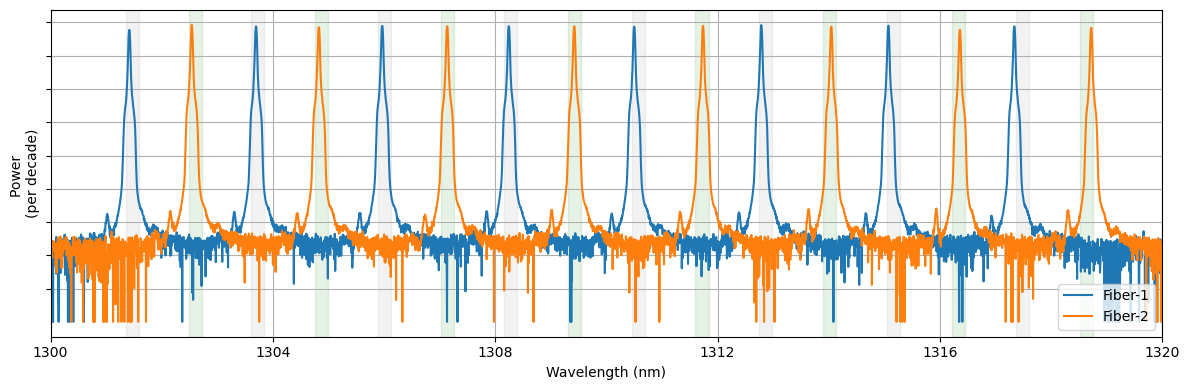

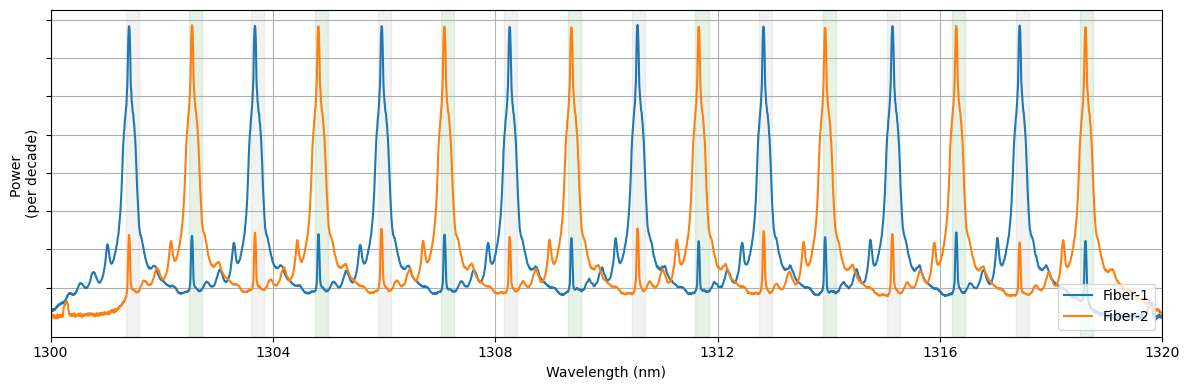

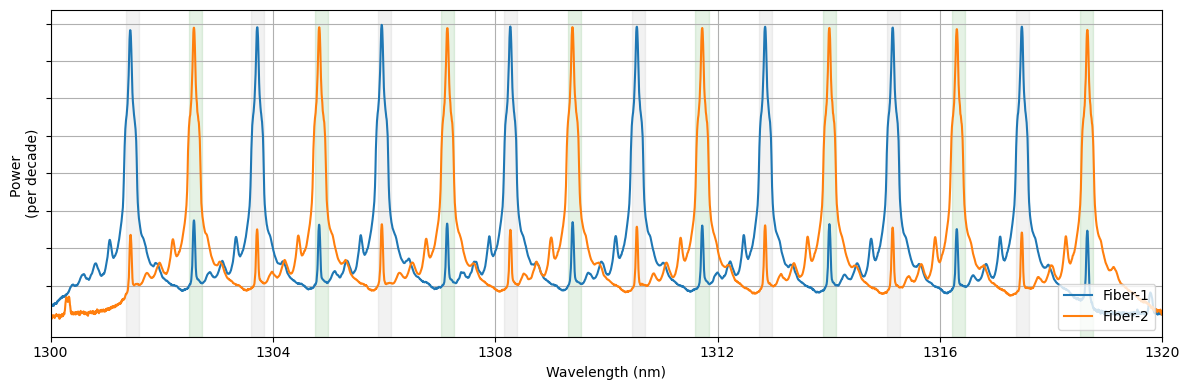

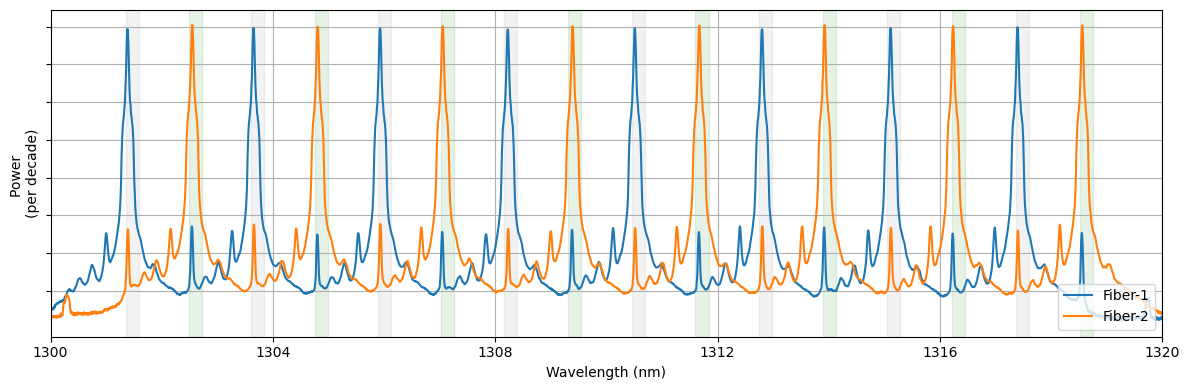

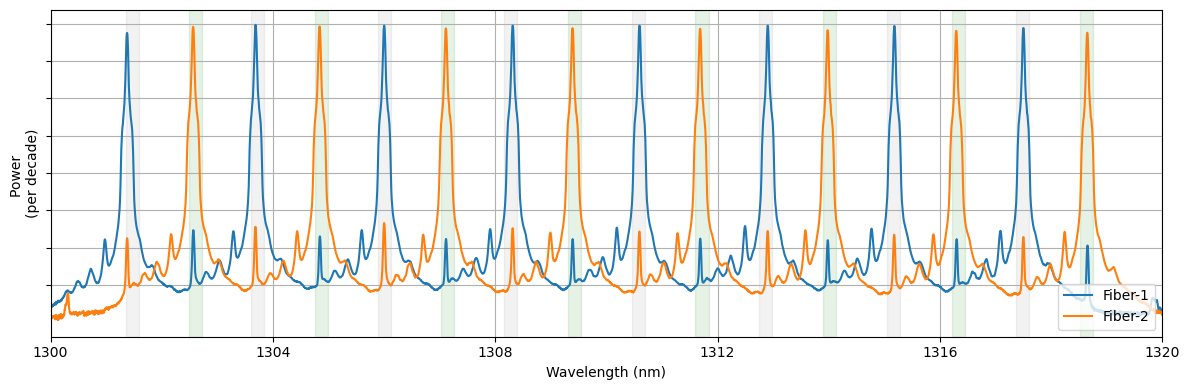

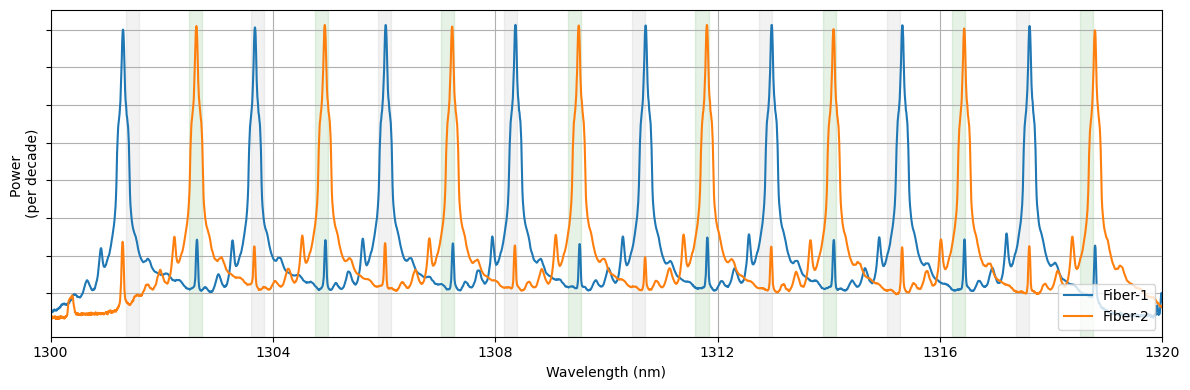

In [7]:
tile_opo_01 = pd.read_csv('tile_opo/328_01_TP2_3_Spectrum_51p57C.csv')
spectrum_plot(tile_opo_01, yticks_range=np.arange(-90, 0, 10), title='Tile OPO #01 at 51.57C')
tile_opo_02 = pd.read_csv('tile_opo/328_02_TP2_3_Spectrum_44p74C.csv')
spectrum_plot(tile_opo_02, yticks_range=np.arange(-60, 20, 10), title='Tile OPO #02 at 44.74C')
tile_opo_03 = pd.read_csv('tile_opo/328_03_TP2_3_Spectrum_47p74C.csv')
spectrum_plot(tile_opo_03, yticks_range=np.arange(-60, 20, 10), title='Tile OPO #03 at 47.74C')
tile_opo_05 = pd.read_csv('tile_opo/328_05_TP2_3_Spectrum_45p5C.csv')
spectrum_plot(tile_opo_05, yticks_range=np.arange(-60, 20, 10), title='Tile OPO #05 at 45.5C')
tile_opo_06 = pd.read_csv('tile_opo/328_06_TP2_3_Spectrum_48p4C.csv')
spectrum_plot(tile_opo_06, yticks_range=np.arange(-60, 20, 10), title='Tile OPO #06 at 48.4C')
tile_opo_07 = pd.read_csv('tile_opo/328_07_TP2_3_Spectrum_48p48C.csv')
spectrum_plot(tile_opo_07, yticks_range=np.arange(-60, 20, 10), title='Tile OPO #07 at 48.48C')

In [8]:
peaks_tile_opo_1_bank_A_wavelengths = tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_1_bank_B_wavelengths = tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_2_bank_A_wavelengths = tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_2_bank_B_wavelengths = tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_3_bank_A_wavelengths = tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_3_bank_B_wavelengths = tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_A_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_B_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_6_bank_A_wavelengths = tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_6_bank_B_wavelengths = tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_7_bank_A_wavelengths = tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_7_bank_B_wavelengths = tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank1'], height=-20)[0].tolist()]

peaks_tile_opo_1_bank_A_frequencies = const.c/tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_1_bank_B_frequencies = const.c/tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank1'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_2_bank_A_frequencies = const.c/tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_2_bank_B_frequencies = const.c/tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank1'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_3_bank_A_frequencies = const.c/tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_3_bank_B_frequencies = const.c/tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank1'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_5_bank_A_frequencies = const.c/tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_5_bank_B_frequencies = const.c/tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_6_bank_A_frequencies = const.c/tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_6_bank_B_frequencies = const.c/tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank1'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_7_bank_A_frequencies = const.c/tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank0'], height=-20)[0].tolist()]/1e-9/1e12
peaks_tile_opo_7_bank_B_frequencies = const.c/tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank1'], height=-20)[0].tolist()]/1e-9/1e12

In [9]:
peaks_tile_opo_1_bank_A_wavelength_error = tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_1_bank_B_wavelength_error = tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B
peaks_tile_opo_2_bank_A_wavelength_error = tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_2_bank_B_wavelength_error = tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B
peaks_tile_opo_3_bank_A_wavelength_error = tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_3_bank_B_wavelength_error = tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B
peaks_tile_opo_5_bank_A_wavelength_error = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_5_bank_B_wavelength_error = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B
peaks_tile_opo_6_bank_A_wavelength_error = tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_6_bank_B_wavelength_error = tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B
peaks_tile_opo_7_bank_A_wavelength_error = tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank0'], height=-20)[0].tolist()] - wavelength_target_nm_A
peaks_tile_opo_7_bank_B_wavelength_error = tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank1'], height=-20)[0].tolist()] - wavelength_target_nm_B

peaks_tiles_opo_1_bank_A_frequency_error = peaks_tile_opo_1_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_1_bank_B_frequency_error = peaks_tile_opo_1_bank_B_frequencies - freq_target_THz_B
peaks_tiles_opo_2_bank_A_frequency_error = peaks_tile_opo_2_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_2_bank_B_frequency_error = peaks_tile_opo_2_bank_B_frequencies - freq_target_THz_B
peaks_tiles_opo_3_bank_A_frequency_error = peaks_tile_opo_3_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_3_bank_B_frequency_error = peaks_tile_opo_3_bank_B_frequencies - freq_target_THz_B
peaks_tiles_opo_5_bank_A_frequency_error = peaks_tile_opo_5_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_5_bank_B_frequency_error = peaks_tile_opo_5_bank_B_frequencies - freq_target_THz_B
peaks_tiles_opo_6_bank_A_frequency_error = peaks_tile_opo_6_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_6_bank_B_frequency_error = peaks_tile_opo_6_bank_B_frequencies - freq_target_THz_B
peaks_tiles_opo_7_bank_A_frequency_error = peaks_tile_opo_7_bank_A_frequencies - freq_target_THz_A
peaks_tiles_opo_7_bank_B_frequency_error = peaks_tile_opo_7_bank_B_frequencies - freq_target_THz_B

channel_spacing_tile_opo_1_bank_A = np.diff(peaks_tile_opo_1_bank_A_frequencies)
channel_spacing_tile_opo_1_bank_B = np.diff(peaks_tile_opo_1_bank_B_frequencies)
channel_spacing_tile_opo_2_bank_A = np.diff(peaks_tile_opo_2_bank_A_frequencies)
channel_spacing_tile_opo_2_bank_B = np.diff(peaks_tile_opo_2_bank_B_frequencies)
channel_spacing_tile_opo_3_bank_A = np.diff(peaks_tile_opo_3_bank_A_frequencies)
channel_spacing_tile_opo_3_bank_B = np.diff(peaks_tile_opo_3_bank_B_frequencies)
channel_spacing_tile_opo_5_bank_A = np.diff(peaks_tile_opo_5_bank_A_frequencies)
channel_spacing_tile_opo_5_bank_B = np.diff(peaks_tile_opo_5_bank_B_frequencies)
channel_spacing_tile_opo_6_bank_A = np.diff(peaks_tile_opo_6_bank_A_frequencies)
channel_spacing_tile_opo_6_bank_B = np.diff(peaks_tile_opo_6_bank_B_frequencies)
channel_spacing_tile_opo_7_bank_A = np.diff(peaks_tile_opo_7_bank_A_frequencies)
channel_spacing_tile_opo_7_bank_B = np.diff(peaks_tile_opo_7_bank_B_frequencies)

In [10]:
peaks_tile_opo_1_bank_A_powers_dBm = find_peaks(tile_opo_01['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_1_bank_B_powers_dBm = find_peaks(tile_opo_01['bank1'], height=-20)[1]['peak_heights']
peaks_tile_opo_2_bank_A_powers_dBm = find_peaks(tile_opo_02['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_2_bank_B_powers_dBm = find_peaks(tile_opo_02['bank1'], height=-20)[1]['peak_heights']
peaks_tile_opo_3_bank_A_powers_dBm = find_peaks(tile_opo_03['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_3_bank_B_powers_dBm = find_peaks(tile_opo_03['bank1'], height=-20)[1]['peak_heights']
peaks_tile_opo_5_bank_A_powers_dBm = find_peaks(tile_opo_05['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_5_bank_B_powers_dBm = find_peaks(tile_opo_05['bank1'], height=-20)[1]['peak_heights']
peaks_tile_opo_6_bank_A_powers_dBm = find_peaks(tile_opo_06['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_6_bank_B_powers_dBm = find_peaks(tile_opo_06['bank1'], height=-20)[1]['peak_heights']
peaks_tile_opo_7_bank_A_powers_dBm = find_peaks(tile_opo_07['bank0'], height=-20)[1]['peak_heights']
peaks_tile_opo_7_bank_B_powers_dBm = find_peaks(tile_opo_07['bank1'], height=-20)[1]['peak_heights']

peaks_tile_opo_1_bank_A_powers_mW = 10**(peaks_tile_opo_1_bank_A_powers_dBm/10)
peaks_tile_opo_2_bank_A_powers_mW = 10**(peaks_tile_opo_2_bank_A_powers_dBm/10)
peaks_tile_opo_3_bank_A_powers_mW = 10**(peaks_tile_opo_3_bank_A_powers_dBm/10)
peaks_tile_opo_5_bank_A_powers_mW = 10**(peaks_tile_opo_5_bank_A_powers_dBm/10)
peaks_tile_opo_6_bank_A_powers_mW = 10**(peaks_tile_opo_6_bank_A_powers_dBm/10)
peaks_tile_opo_7_bank_A_powers_mW = 10**(peaks_tile_opo_7_bank_A_powers_dBm/10)
peaks_tile_opo_1_bank_B_powers_mW = 10**(peaks_tile_opo_1_bank_B_powers_dBm/10)
peaks_tile_opo_2_bank_B_powers_mW = 10**(peaks_tile_opo_2_bank_B_powers_dBm/10)
peaks_tile_opo_3_bank_B_powers_mW = 10**(peaks_tile_opo_3_bank_B_powers_dBm/10)
peaks_tile_opo_5_bank_B_powers_mW = 10**(peaks_tile_opo_5_bank_B_powers_dBm/10)
peaks_tile_opo_6_bank_B_powers_mW = 10**(peaks_tile_opo_6_bank_B_powers_dBm/10)
peaks_tile_opo_7_bank_B_powers_mW = 10**(peaks_tile_opo_7_bank_B_powers_dBm/10)

tile_opo_1_bank_A_powers_dB = (((peaks_tile_opo_1_bank_A_powers_mW - np.mean(peaks_tile_opo_1_bank_A_powers_mW))/np.mean(peaks_tile_opo_1_bank_A_powers_mW) + 1) * tile_opo_1_bank_A_total_power / 8)
tile_opo_2_bank_A_powers_dB = (((peaks_tile_opo_2_bank_A_powers_mW - np.mean(peaks_tile_opo_2_bank_A_powers_mW))/np.mean(peaks_tile_opo_2_bank_A_powers_mW) + 1) * tile_opo_2_bank_A_total_power / 8)
tile_opo_3_bank_A_powers_dB = (((peaks_tile_opo_3_bank_A_powers_mW - np.mean(peaks_tile_opo_3_bank_A_powers_mW))/np.mean(peaks_tile_opo_3_bank_A_powers_mW) + 1) * tile_opo_3_bank_A_total_power / 8)
tile_opo_5_bank_A_powers_dB = (((peaks_tile_opo_5_bank_A_powers_mW - np.mean(peaks_tile_opo_5_bank_A_powers_mW))/np.mean(peaks_tile_opo_5_bank_A_powers_mW) + 1) * tile_opo_5_bank_A_total_power / 8)
tile_opo_6_bank_A_powers_dB = (((peaks_tile_opo_6_bank_A_powers_mW - np.mean(peaks_tile_opo_6_bank_A_powers_mW))/np.mean(peaks_tile_opo_6_bank_A_powers_mW) + 1) * tile_opo_6_bank_A_total_power / 8)
tile_opo_7_bank_A_powers_dB = (((peaks_tile_opo_7_bank_A_powers_mW - np.mean(peaks_tile_opo_7_bank_A_powers_mW))/np.mean(peaks_tile_opo_7_bank_A_powers_mW) + 1) * tile_opo_7_bank_A_total_power / 8)
tile_opo_1_bank_B_powers_dB = (((peaks_tile_opo_1_bank_B_powers_mW - np.mean(peaks_tile_opo_1_bank_B_powers_mW))/np.mean(peaks_tile_opo_1_bank_B_powers_mW) + 1) * tile_opo_1_bank_B_total_power / 8)
tile_opo_2_bank_B_powers_dB = (((peaks_tile_opo_2_bank_B_powers_mW - np.mean(peaks_tile_opo_2_bank_B_powers_mW))/np.mean(peaks_tile_opo_2_bank_B_powers_mW) + 1) * tile_opo_2_bank_B_total_power / 8)
tile_opo_3_bank_B_powers_dB = (((peaks_tile_opo_3_bank_B_powers_mW - np.mean(peaks_tile_opo_3_bank_B_powers_mW))/np.mean(peaks_tile_opo_3_bank_B_powers_mW) + 1) * tile_opo_3_bank_B_total_power / 8)
tile_opo_5_bank_B_powers_dB = (((peaks_tile_opo_5_bank_B_powers_mW - np.mean(peaks_tile_opo_5_bank_B_powers_mW))/np.mean(peaks_tile_opo_5_bank_B_powers_mW) + 1) * tile_opo_5_bank_B_total_power / 8)
tile_opo_6_bank_B_powers_dB = (((peaks_tile_opo_6_bank_B_powers_mW - np.mean(peaks_tile_opo_6_bank_B_powers_mW))/np.mean(peaks_tile_opo_6_bank_B_powers_mW) + 1) * tile_opo_6_bank_B_total_power / 8)
tile_opo_7_bank_B_powers_dB = (((peaks_tile_opo_7_bank_B_powers_mW - np.mean(peaks_tile_opo_7_bank_B_powers_mW))/np.mean(peaks_tile_opo_7_bank_B_powers_mW) + 1) * tile_opo_7_bank_B_total_power / 8)


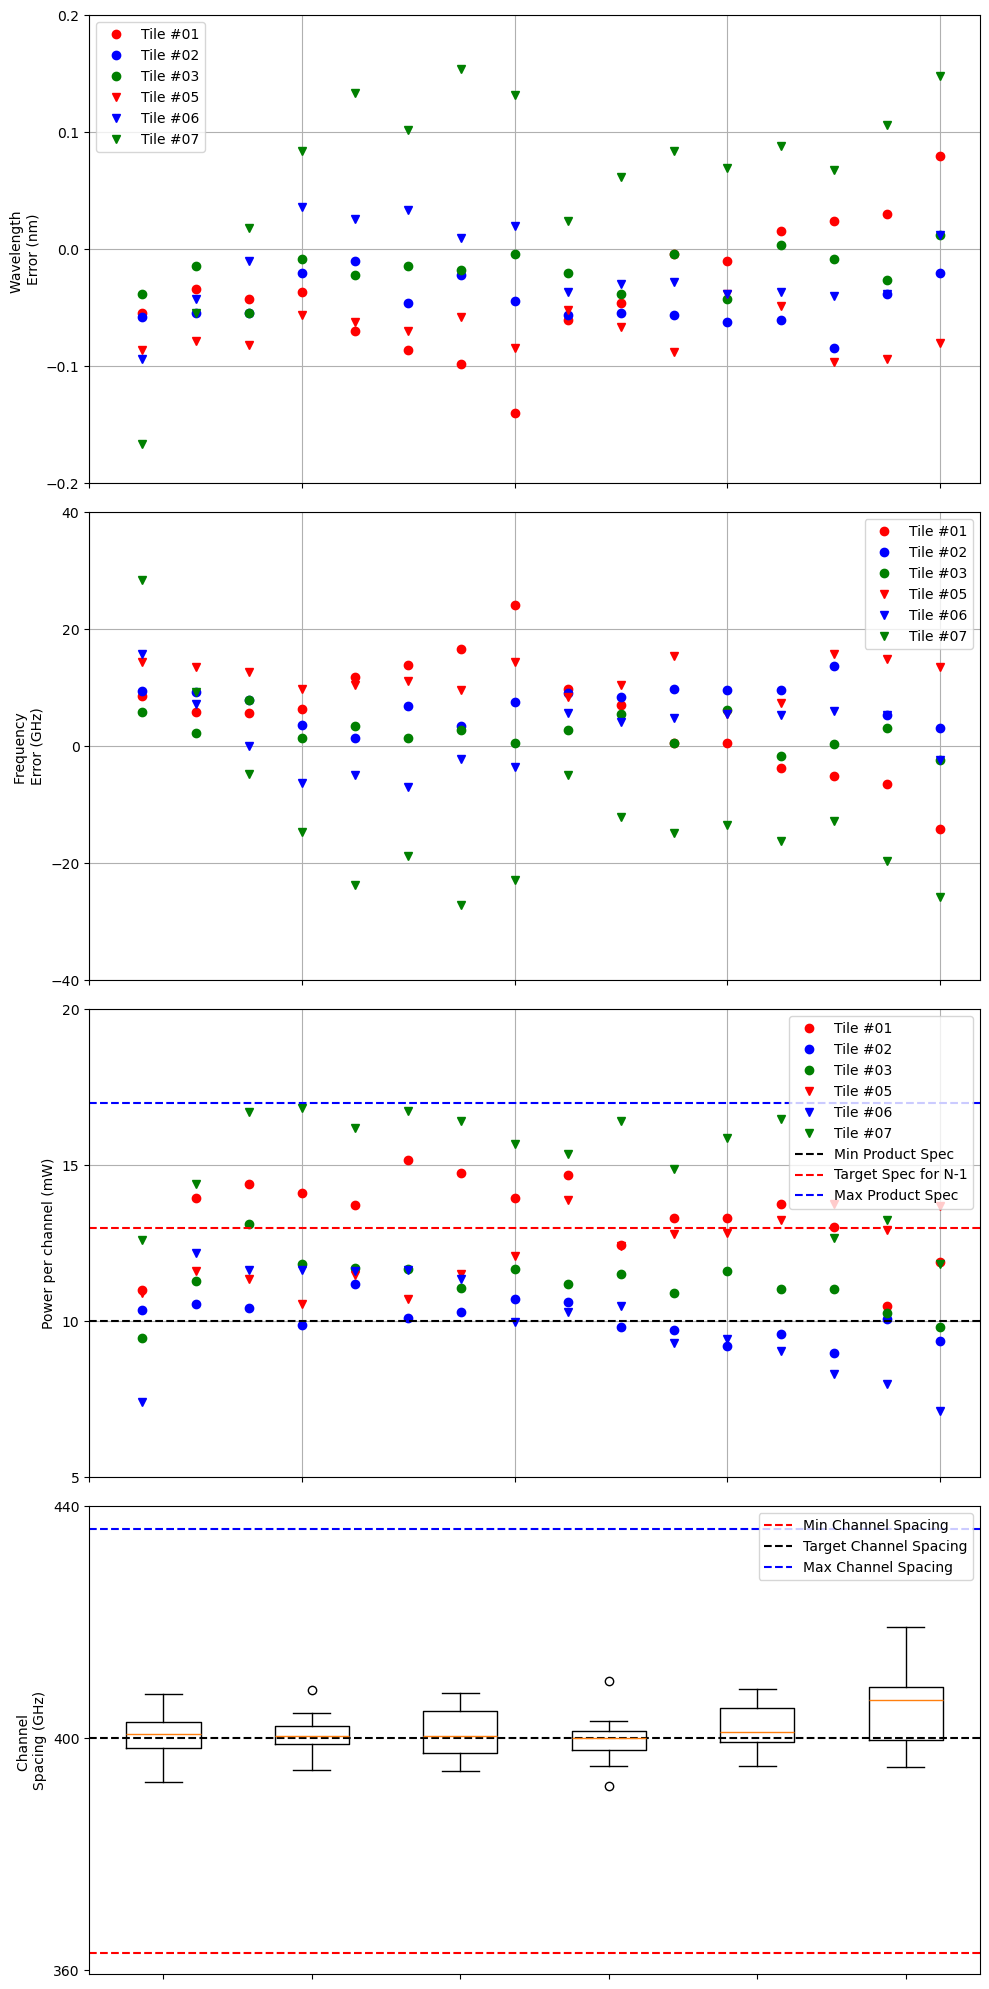

In [11]:
plt.figure(figsize=(10,20))
plt.subplot(411)
plt.plot(np.linspace(1,8,8), peaks_tile_opo_1_bank_A_wavelength_error, 'ro')
plt.plot(np.linspace(9,16,8), peaks_tile_opo_1_bank_B_wavelength_error, 'ro', label='Tile #01')
plt.plot(np.linspace(1,8,8), peaks_tile_opo_2_bank_A_wavelength_error, 'bo')
plt.plot(np.linspace(9,16,8), peaks_tile_opo_2_bank_B_wavelength_error, 'bo', label='Tile #02')
plt.plot(np.linspace(1,8,8), peaks_tile_opo_3_bank_A_wavelength_error, 'go')
plt.plot(np.linspace(9,16,8), peaks_tile_opo_3_bank_B_wavelength_error, 'go', label='Tile #03')
plt.plot(np.linspace(1,8,8), peaks_tile_opo_5_bank_A_wavelength_error, 'rv')
plt.plot(np.linspace(9,16,8), peaks_tile_opo_5_bank_B_wavelength_error, 'rv', label='Tile #05')
plt.plot(np.linspace(1,8,8), peaks_tile_opo_6_bank_A_wavelength_error, 'bv')
plt.plot(np.linspace(9,16,8), peaks_tile_opo_6_bank_B_wavelength_error, 'bv', label='Tile #06')
plt.plot(np.linspace(1,8,8), peaks_tile_opo_7_bank_A_wavelength_error, 'gv')
plt.plot(np.linspace(9,16,8), peaks_tile_opo_7_bank_B_wavelength_error, 'gv', label='Tile #07')
plt.legend(fontsize=10)
plt.xticks(np.arange(0, 17, 4))
plt.yticks(np.arange(-0.2, 0.3, 0.1))
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
plt.ylabel('Wavelength \nError (nm)')
plt.grid(True)

plt.subplot(412)
plt.plot(np.linspace(1,8,8), peaks_tiles_opo_1_bank_A_frequency_error*1e3, 'ro')
plt.plot(np.linspace(9,16,8), peaks_tiles_opo_1_bank_B_frequency_error*1e3, 'ro', label='Tile #01')
plt.plot(np.linspace(1,8,8), peaks_tiles_opo_2_bank_A_frequency_error*1e3, 'bo')
plt.plot(np.linspace(9,16,8), peaks_tiles_opo_2_bank_B_frequency_error*1e3, 'bo', label='Tile #02')
plt.plot(np.linspace(1,8,8), peaks_tiles_opo_3_bank_A_frequency_error*1e3, 'go')
plt.plot(np.linspace(9,16,8), peaks_tiles_opo_3_bank_B_frequency_error*1e3, 'go', label='Tile #03')
plt.plot(np.linspace(1,8,8), peaks_tiles_opo_5_bank_A_frequency_error*1e3, 'rv')
plt.plot(np.linspace(9,16,8), peaks_tiles_opo_5_bank_B_frequency_error*1e3, 'rv', label='Tile #05')
plt.plot(np.linspace(1,8,8), peaks_tiles_opo_6_bank_A_frequency_error*1e3, 'bv')
plt.plot(np.linspace(9,16,8), peaks_tiles_opo_6_bank_B_frequency_error*1e3, 'bv', label='Tile #06')
plt.plot(np.linspace(1,8,8), peaks_tiles_opo_7_bank_A_frequency_error*1e3, 'gv')
plt.plot(np.linspace(9,16,8), peaks_tiles_opo_7_bank_B_frequency_error*1e3, 'gv', label='Tile #07')
plt.legend(fontsize=10)
plt.xticks(np.arange(0, 17, 4))
plt.yticks(np.arange(-40, 60, 20))
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
plt.ylabel('Frequency \nError (GHz)')
plt.grid(True)


ax = plt.subplot(413)
plt.plot(np.linspace(1,8,8), tile_opo_1_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_1_bank_B_powers_dB, 'ro', label='Tile #01')
plt.plot(np.linspace(1,8,8), tile_opo_2_bank_A_powers_dB, 'bo')
plt.plot(np.linspace(9,16,8), tile_opo_2_bank_B_powers_dB, 'bo', label='Tile #02')
plt.plot(np.linspace(1,8,8), tile_opo_3_bank_A_powers_dB, 'go')
plt.plot(np.linspace(9,16,8), tile_opo_3_bank_B_powers_dB, 'go', label='Tile #03')
plt.plot(np.linspace(1,8,8), tile_opo_5_bank_A_powers_dB, 'rv')
plt.plot(np.linspace(9,16,8), tile_opo_5_bank_B_powers_dB, 'rv', label='Tile #05')
plt.plot(np.linspace(1,8,8), tile_opo_6_bank_A_powers_dB, 'bv')
plt.plot(np.linspace(9,16,8), tile_opo_6_bank_B_powers_dB, 'bv', label='Tile #06')
plt.plot(np.linspace(1,8,8), tile_opo_7_bank_A_powers_dB, 'gv')
plt.plot(np.linspace(9,16,8), tile_opo_7_bank_B_powers_dB, 'gv', label='Tile #07')
ax.axhline(y=10, color='black', linestyle='--', label='Min Product Spec')
ax.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax.axhline(y=17, color='blue', linestyle='--', label='Max Product Spec')
plt.legend(fontsize=10)
plt.xticks(np.arange(0, 17, 4))
plt.yticks(np.arange(5,20))
plt.yticks(np.arange(5, 22, 5))
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
plt.grid(True)
plt.ylabel('Power per channel (mW)')

ax = plt.subplot(414)
ax.axhline(y=363, color='red', linestyle='--', label='Min Channel Spacing')
ax.axhline(y=400, color='black', linestyle='--', label='Target Channel Spacing')
ax.axhline(y=436, color='blue', linestyle='--', label='Max Channel Spacing')
plt.boxplot([np.abs(np.append(channel_spacing_tile_opo_1_bank_A, channel_spacing_tile_opo_1_bank_B))*1e3, 
             np.abs(np.append(channel_spacing_tile_opo_2_bank_A, channel_spacing_tile_opo_2_bank_B))*1e3, 
             np.abs(np.append(channel_spacing_tile_opo_3_bank_A, channel_spacing_tile_opo_3_bank_B))*1e3, 
             np.abs(np.append(channel_spacing_tile_opo_5_bank_A, channel_spacing_tile_opo_5_bank_B))*1e3, 
             np.abs(np.append(channel_spacing_tile_opo_6_bank_A, channel_spacing_tile_opo_6_bank_B))*1e3, 
             np.abs(np.append(channel_spacing_tile_opo_7_bank_A, channel_spacing_tile_opo_7_bank_B))*1e3], positions=np.linspace(1, 6, 6))

plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
plt.yticks(np.arange(360, 460, 40))
plt.ylabel('Channel \nSpacing (GHz)')
plt.legend(fontsize=10)

plt.tight_layout()

In [12]:
peaks_tile_opo_1_bank_A_wavelengths = tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_1_bank_B_wavelengths = tile_opo_01['wavelength'][find_peaks(tile_opo_01['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_2_bank_A_wavelengths = tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_2_bank_B_wavelengths = tile_opo_02['wavelength'][find_peaks(tile_opo_02['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_3_bank_A_wavelengths = tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_3_bank_B_wavelengths = tile_opo_03['wavelength'][find_peaks(tile_opo_03['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_A_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_5_bank_B_wavelengths = tile_opo_05['wavelength'][find_peaks(tile_opo_05['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_6_bank_A_wavelengths = tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_6_bank_B_wavelengths = tile_opo_06['wavelength'][find_peaks(tile_opo_06['bank1'], height=-20)[0].tolist()]
peaks_tile_opo_7_bank_A_wavelengths = tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank0'], height=-20)[0].tolist()]
peaks_tile_opo_7_bank_B_wavelengths = tile_opo_07['wavelength'][find_peaks(tile_opo_07['bank1'], height=-20)[0].tolist()]

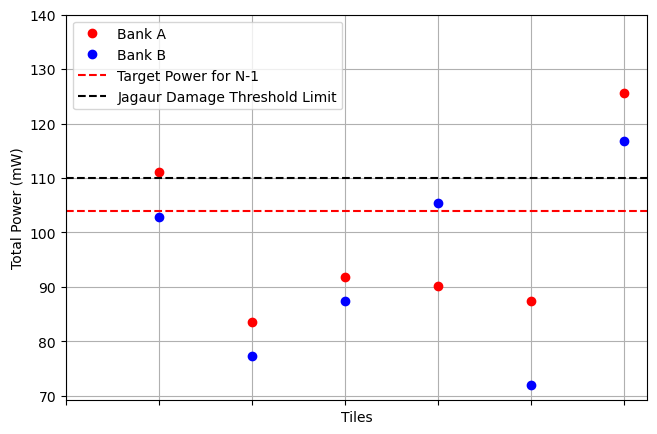

In [13]:
plt.figure(figsize=(7.5,5))
ax = plt.subplot(111)
plt.plot(np.linspace(1,6,6), tile_opo_bank_A, 'ro', label='Bank A')
plt.plot(np.linspace(1,6,6), tile_opo_bank_B, 'bo', label='Bank B')
ax.axhline(y=104, color='red', linestyle='--', label='Target Power for N-1')
ax.axhline(y=110, color='black', linestyle='--', label='Jagaur Damage Threshold Limit')
plt.grid(True)
plt.xticks(np.arange(0, 7, 1))
plt.yticks(np.arange(70, 150, 10))
plt.legend(fontsize=10)
plt.xlabel('Tiles')
plt.ylabel('Total Power (mW)')
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)

In [14]:
currents_tile_opo_1_bank_A = [152, 162, 160, 148, 143, 155, 156, 151]
currents_tile_opo_2_bank_A = [168, 166, 158, 149, 152, 145, 149, 142]
currents_tile_opo_3_bank_A = [149, 160, 155, 151, 151, 155, 149, 157]
currents_tile_opo_5_bank_A = [150, 146, 142, 137, 134, 136, 143, 141]
currents_tile_opo_6_bank_A = [169, 170, 162, 156, 150, 146, 143, 134]
currents_tile_opo_7_bank_A = [170, 170, 170, 167, 165, 161, 168, 150]
currents_tile_opo_1_bank_B = [160, 145, 150, 149, 152, 152, 131, 133]
currents_tile_opo_2_bank_B = [150, 143, 142, 139, 136, 137, 145, 146]
currents_tile_opo_3_bank_B = [155, 145, 148, 150, 151, 148, 141, 138]
currents_tile_opo_5_bank_B = [143, 131, 130, 139, 143, 140, 140, 147]
currents_tile_opo_6_bank_B = [168, 157, 150, 145, 143, 136, 130, 128]
currents_tile_opo_7_bank_B = [165, 166, 160, 157, 159, 147, 145, 143]

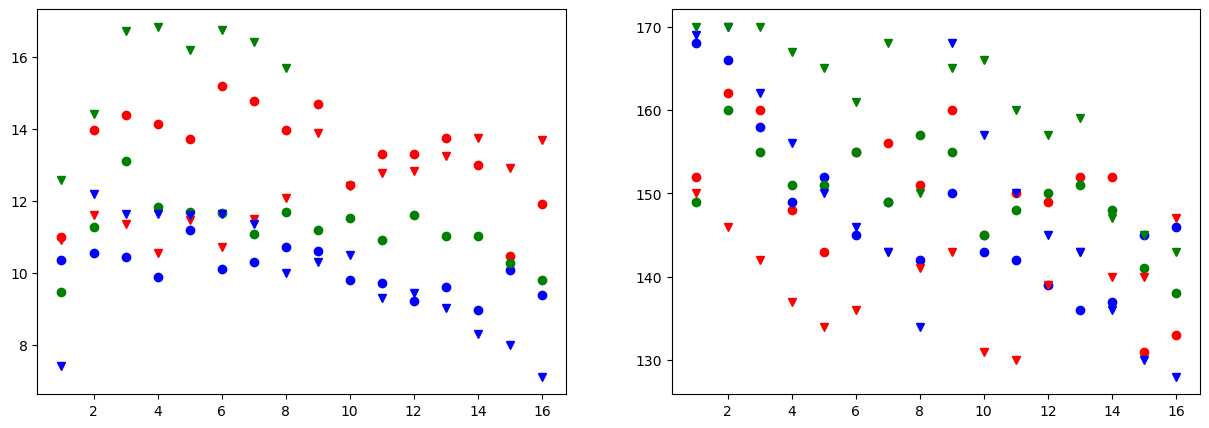

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.linspace(1,8,8), tile_opo_1_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_1_bank_B_powers_dB, 'ro', label='Tile #01')
plt.plot(np.linspace(1,8,8), tile_opo_2_bank_A_powers_dB, 'bo')
plt.plot(np.linspace(9,16,8), tile_opo_2_bank_B_powers_dB, 'bo', label='Tile #02')
plt.plot(np.linspace(1,8,8), tile_opo_3_bank_A_powers_dB, 'go')
plt.plot(np.linspace(9,16,8), tile_opo_3_bank_B_powers_dB, 'go', label='Tile #03')
plt.plot(np.linspace(1,8,8), tile_opo_5_bank_A_powers_dB, 'rv')
plt.plot(np.linspace(9,16,8), tile_opo_5_bank_B_powers_dB, 'rv', label='Tile #05')
plt.plot(np.linspace(1,8,8), tile_opo_6_bank_A_powers_dB, 'bv')
plt.plot(np.linspace(9,16,8), tile_opo_6_bank_B_powers_dB, 'bv', label='Tile #06')
plt.plot(np.linspace(1,8,8), tile_opo_7_bank_A_powers_dB, 'gv')
# plt.plot(np.linspace(9,16,8), tile_opo_7_bank_B_powers_dB, 'gv', label='Tile #07')
# ax.axhline(y=10, color='black', linestyle='--', label='Min Product Spec')
# ax.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
# ax.axhline(y=17, color='blue', linestyle='--', label='Max Product Spec')
# plt.legend(fontsize=10)
# plt.xticks(np.arange(0, 17, 4))
# plt.yticks(np.arange(5,20))
# plt.yticks(np.arange(5, 22, 5))
# plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
# plt.grid(True)
# plt.ylabel('Power per channel (mW)')

plt.subplot(122)
plt.plot(np.linspace(1,8,8), currents_tile_opo_1_bank_A, 'ro')
plt.plot(np.linspace(9,16,8), currents_tile_opo_1_bank_B, 'ro', label='Tile #01')
plt.plot(np.linspace(1,8,8), currents_tile_opo_2_bank_A, 'bo')
plt.plot(np.linspace(9,16,8), currents_tile_opo_2_bank_B, 'bo', label='Tile #02')
plt.plot(np.linspace(1,8,8), currents_tile_opo_3_bank_A, 'go')
plt.plot(np.linspace(9,16,8), currents_tile_opo_3_bank_B, 'go', label='Tile #03')
plt.plot(np.linspace(1,8,8), currents_tile_opo_5_bank_A, 'rv')
plt.plot(np.linspace(9,16,8), currents_tile_opo_5_bank_B, 'rv', label='Tile #05')
plt.plot(np.linspace(1,8,8), currents_tile_opo_6_bank_A, 'bv')
plt.plot(np.linspace(9,16,8), currents_tile_opo_6_bank_B, 'bv', label='Tile #06')
plt.plot(np.linspace(1,8,8), currents_tile_opo_7_bank_A, 'gv')
plt.plot(np.linspace(9,16,8), currents_tile_opo_7_bank_B, 'gv', label='Tile #07')


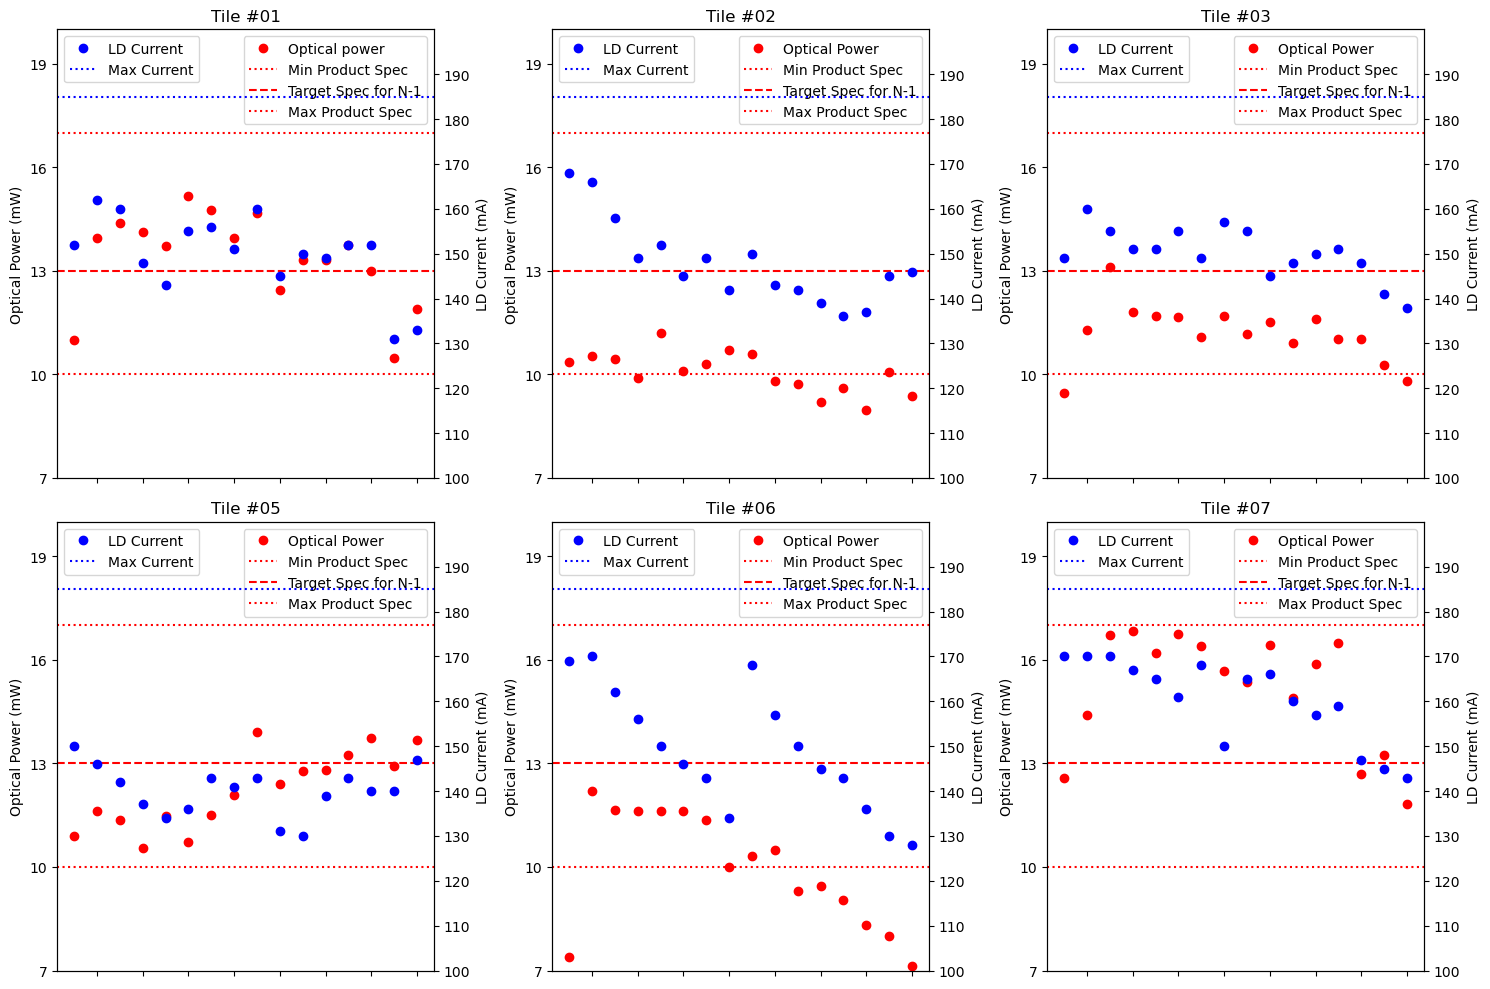

In [16]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(231)
plt.plot(np.linspace(1,8,8), tile_opo_1_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_1_bank_B_powers_dB, 'ro', label='Optical power')
ax1.axhline(y=10, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax1.axhline(y=17, color='red', linestyle=':', label='Max Product Spec')
ax1.set_ylim(7, 20)
ax1.set_yticks(np.arange(7, 22, 3))
ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), currents_tile_opo_1_bank_A, 'bo')
ax2.plot(np.linspace(9,16,8), currents_tile_opo_1_bank_B, 'bo', label='LD Current')
ax2.axhline(y=185, color='blue', linestyle=':', label='Max Current')
ax2.set_ylim(100, 200)
ax2.set_yticks(np.arange(100, 200, 10))
ax1.legend(fontsize=10, loc=1)
ax2.legend(fontsize=10, loc=2)
ax1.set_ylabel('Optical Power (mW)')
ax2.set_ylabel('LD Current (mA)')
ax1.set_title('Tile #01')

ax1 = plt.subplot(232)
plt.plot(np.linspace(1,8,8), tile_opo_2_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_2_bank_B_powers_dB, 'ro', label='Optical Power')
ax1.axhline(y=10, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax1.axhline(y=17, color='red', linestyle=':', label='Max Product Spec')
ax1.set_ylim(7, 20)
ax1.set_yticks(np.arange(7, 22, 3))
ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), currents_tile_opo_2_bank_A, 'bo')
ax2.plot(np.linspace(9,16,8), currents_tile_opo_2_bank_B, 'bo', label='LD Current')
ax2.axhline(y=185, color='blue', linestyle=':', label='Max Current')
ax2.set_ylim(100, 200)
ax2.set_yticks(np.arange(100, 200, 10))
ax1.legend(fontsize=10, loc=1)
ax2.legend(fontsize=10, loc=2)
ax1.set_ylabel('Optical Power (mW)')
ax2.set_ylabel('LD Current (mA)')
ax1.set_title('Tile #02')

ax1 = plt.subplot(233)
plt.plot(np.linspace(1,8,8), tile_opo_3_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_3_bank_B_powers_dB, 'ro', label='Optical Power')
ax1.axhline(y=10, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax1.axhline(y=17, color='red', linestyle=':', label='Max Product Spec')
ax1.set_ylim(7, 20)
ax1.set_yticks(np.arange(7, 22, 3))
ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), currents_tile_opo_3_bank_A, 'bo')
ax2.plot(np.linspace(9,16,8), currents_tile_opo_3_bank_B, 'bo', label='LD Current')
ax2.axhline(y=185, color='blue', linestyle=':', label='Max Current')
ax2.set_ylim(100, 200)
ax2.set_yticks(np.arange(100, 200, 10))
ax1.legend(fontsize=10, loc=1)
ax2.legend(fontsize=10, loc=2)
ax1.set_ylabel('Optical Power (mW)')
ax2.set_ylabel('LD Current (mA)')
ax1.set_title('Tile #03')

ax1 = plt.subplot(234)
plt.plot(np.linspace(1,8,8), tile_opo_5_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_5_bank_B_powers_dB, 'ro', label='Optical Power')
ax1.axhline(y=10, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax1.axhline(y=17, color='red', linestyle=':', label='Max Product Spec')
ax1.set_ylim(7, 20)
ax1.set_yticks(np.arange(7, 22, 3))
ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), currents_tile_opo_5_bank_A, 'bo')
ax2.plot(np.linspace(9,16,8), currents_tile_opo_5_bank_B, 'bo', label='LD Current')
ax2.axhline(y=185, color='blue', linestyle=':', label='Max Current')
ax2.set_ylim(100, 200)
ax2.set_yticks(np.arange(100, 200, 10))
ax1.legend(fontsize=10, loc=1)
ax2.legend(fontsize=10, loc=2)
ax1.set_ylabel('Optical Power (mW)')
ax2.set_ylabel('LD Current (mA)')
ax1.set_title('Tile #05')

ax1 = plt.subplot(235)
plt.plot(np.linspace(1,8,8), tile_opo_6_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_6_bank_B_powers_dB, 'ro', label='Optical Power')
ax1.axhline(y=10, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax1.axhline(y=17, color='red', linestyle=':', label='Max Product Spec')
ax1.set_ylim(7, 20)
ax1.set_yticks(np.arange(7, 22, 3))
ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), currents_tile_opo_6_bank_A, 'bo')
ax2.plot(np.linspace(9,16,8), currents_tile_opo_6_bank_B, 'bo', label='LD Current')
ax2.axhline(y=185, color='blue', linestyle=':', label='Max Current')
ax2.set_ylim(100, 200)
ax2.set_yticks(np.arange(100, 200, 10))
ax1.legend(fontsize=10, loc=1)
ax2.legend(fontsize=10, loc=2)
ax1.set_ylabel('Optical Power (mW)')
ax2.set_ylabel('LD Current (mA)')
ax1.set_title('Tile #06')

ax1 = plt.subplot(236)
plt.plot(np.linspace(1,8,8), tile_opo_7_bank_A_powers_dB, 'ro')
plt.plot(np.linspace(9,16,8), tile_opo_7_bank_B_powers_dB, 'ro', label='Optical Power')
ax1.axhline(y=10, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=13, color='red', linestyle='--', label='Target Spec for N-1')
ax1.axhline(y=17, color='red', linestyle=':', label='Max Product Spec')
ax1.set_ylim(7, 20)
ax1.set_yticks(np.arange(7, 22, 3))
ax1.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)
ax2 = ax1.twinx()
ax2.plot(np.linspace(1,8,8), currents_tile_opo_7_bank_A, 'bo')
ax2.plot(np.linspace(9,16,8), currents_tile_opo_7_bank_B, 'bo', label='LD Current')
ax2.axhline(y=185, color='blue', linestyle=':', label='Max Current')
ax2.set_ylim(100, 200)
ax2.set_yticks(np.arange(100, 200, 10))
ax1.legend(fontsize=10, loc=1)
ax2.legend(fontsize=10, loc=2)
ax1.set_ylabel('Optical Power (mW)')
ax2.set_ylabel('LD Current (mA)')
ax1.set_title('Tile #07')
plt.tight_layout()
plt.show()


In [17]:
center_wavelength_error = [np.mean(np.append(peaks_tile_opo_1_bank_A_wavelength_error, peaks_tile_opo_1_bank_B_wavelength_error)), np.mean(np.append(peaks_tile_opo_2_bank_A_wavelength_error, peaks_tile_opo_2_bank_B_wavelength_error)), np.mean(np.append(peaks_tile_opo_3_bank_A_wavelength_error, peaks_tile_opo_3_bank_B_wavelength_error)), np.mean(np.append(peaks_tile_opo_5_bank_A_wavelength_error, peaks_tile_opo_5_bank_B_wavelength_error)), np.mean(np.append(peaks_tile_opo_6_bank_A_wavelength_error, peaks_tile_opo_6_bank_B_wavelength_error)), np.mean(np.append(peaks_tile_opo_7_bank_A_wavelength_error, peaks_tile_opo_7_bank_B_wavelength_error))]


In [18]:
center_wavelength_error

[-0.033124999999998295,
 -0.046125000000017735,
 -0.018375000000006025,
 -0.07112499999998079,
 -0.015874999999979877,
 0.06587500000000546]

In [19]:
center_frequency_error = [np.mean(np.append(peaks_tiles_opo_1_bank_A_frequency_error, peaks_tiles_opo_1_bank_B_frequency_error)), np.mean(np.append(peaks_tiles_opo_2_bank_A_frequency_error, peaks_tiles_opo_2_bank_B_frequency_error)), np.mean(np.append(peaks_tiles_opo_3_bank_A_frequency_error, peaks_tiles_opo_3_bank_B_frequency_error)), np.mean(np.append(peaks_tiles_opo_5_bank_A_frequency_error, peaks_tiles_opo_5_bank_B_frequency_error)), np.mean(np.append(peaks_tiles_opo_6_bank_A_frequency_error, peaks_tiles_opo_6_bank_B_frequency_error)), np.mean(np.append(peaks_tiles_opo_7_bank_A_frequency_error, peaks_tiles_opo_7_bank_B_frequency_error))]

In [20]:
center_frequency_error

[0.005115604426004339,
 0.007382728598244626,
 0.0025381832460187326,
 0.011737201249268026,
 0.0021143293734962043,
 -0.012103425724546923]

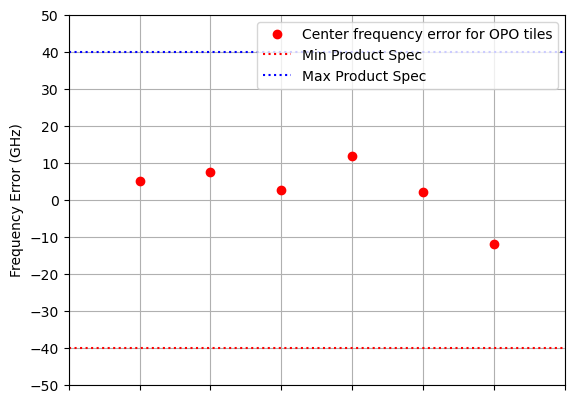

In [21]:
ax1 = plt.subplot(111)
plt.plot(np.linspace(1,6,6), np.array(center_frequency_error)*1000, 'ro', label='Center frequency error for OPO tiles')
plt.grid(True)
plt.ylim(-50, 50)
plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(-50, 60, 10))
ax1.axhline(y=-40, color='red', linestyle=':', label='Min Product Spec')
ax1.axhline(y=40, color='blue', linestyle=':', label='Max Product Spec')
plt.legend(fontsize=10)
plt.ylabel('Frequency Error (GHz)')
plt.tick_params(top=False, bottom=True, left=True, right=False, labelleft=True, labelbottom=False)